In [11]:
import pandas as pd
import json


def read_data():
    with open("./../results/results_2.json") as f:
        data = json.load(f)

    return data


data = read_data()

index = []

for key in data.keys():
    for key_2 in data[key].keys():
        for key_3 in data[key][key_2].keys():
            index.append((key, key_2, key_3))

df = pd.DataFrame(
    columns=[
        "std_memory",
        "errors",
        "iterations",
        "std_time",
        "std_errors",
        "memory",
        "times",
        "std_iterations",
    ], index=pd.MultiIndex.from_tuples(index)
)

for key in data.keys():
    for key_2 in data[key].keys():
        for key_3 in data[key][key_2].keys():
            df.loc[(key, key_2, key_3)] = data[key][key_2][key_3]
            
df.reset_index(inplace=True)
df.columns = ['matrice', 'tolleranza', 'metodo', 'std_memory', 'errors', 'iterations', 'std_time', 'std_errors', 'memory', 'times', 'std_iterations']
df.head()

,matrice,tolleranza,metodo,std_memory,errors,iterations,std_time,std_errors,memory,times,std_iterations
0,spa1,1.0e-7,ConjugateGradient,0.0,0.0,147.0,0.007196,0.0,6.006752,0.061,0.0
1,spa1,1.0e-7,Gradient,0.0,0.0,5896.0,0.037187,0.0,143.800816,1.2402,0.0
2,spa1,1.0e-7,JacobiMethod,0.0,0.0,215.0,0.010617,0.0,10.661536,0.0394,0.0
3,spa1,1.0e-7,GaussSeidelMethod,0.0,0.0,21.0,0.100838,0.0,63.624016,0.406,0.0
4,spa1,1.0e-5,ConjugateGradient,0.0,0.000009,99.0,0.068161,0.0,4.056032,0.0862,0.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("ggplot")

In [13]:
df = df.astype({'std_memory': 'float64', 'errors': 'float64', 'iterations': 'int64', 
           'std_time': 'float64', 'std_errors': 'float64', 'memory': 'float64', 
           'times': 'float64', 'std_iterations': 'float64', 'tolleranza': 'float64'})

In [21]:
def theoretical_complexity(method, matrix_size, iterations):
    if method == "ConjugateGradient":
        return iterations * matrix_size**2
    elif method == "Gradient":
        return iterations * matrix_size**2
    elif method == "Jacobi":
        return iterations * matrix_size**2
    else:
        return iterations * matrix_size**2

def traslation_theoretical_compl(theoric, pratical):
    theoric = theoric / max(theoric)
    theoric = theoric * max(pratical)
    return theoric

matrix_sizes = {"spa1": 1000, "vem1": 1681, "spa2": 3000, "vem2": 2601}

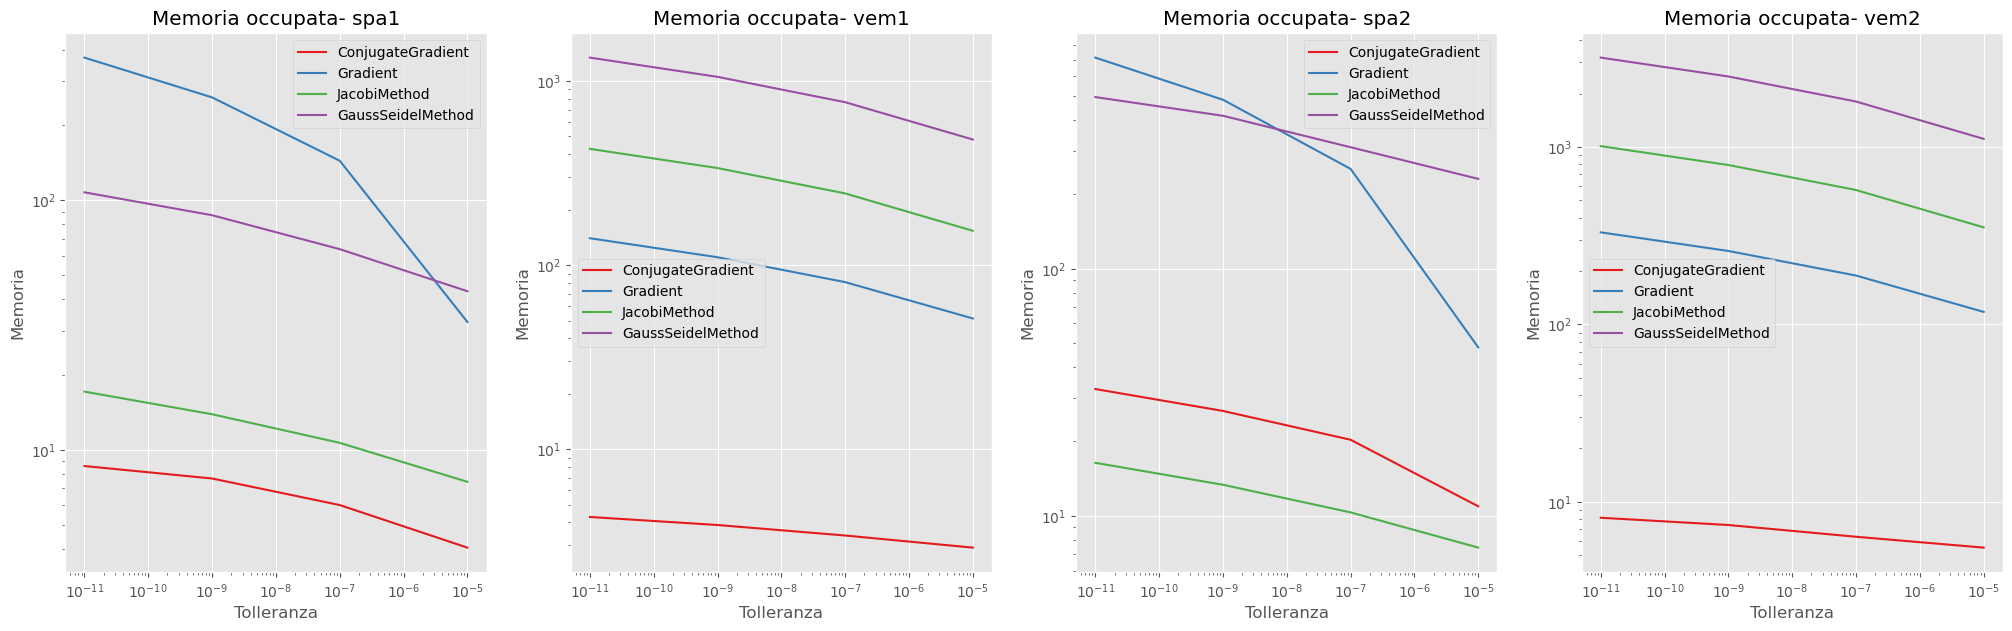

In [15]:
def aggiungi_linea_complessita(ax, x, y, label, color):
    ax.plot(x, y, linestyle="--", label=label, color=color)


colors = list(sns.color_palette("Set1", n_colors=8))


matrici = df["matrice"].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(matrici), figsize=(25, 7))

# Itera attraverso ogni matrice
for idx, matrice in enumerate(matrici):
    # Filtra i dati per la matrice corrente
    df_matrice = df[df["matrice"] == matrice]
    df_matrice = df_matrice.sort_values(by="tolleranza")

    for col, metodo in enumerate(df_matrice["metodo"].unique()):
        df_metodo = df_matrice[df_matrice["metodo"] == metodo]
        df_metodo = df_metodo.sort_values(by=["tolleranza"], axis=0, ascending=False)
        sns.lineplot(
            ax=axes[idx],
            data=df_metodo,
            x="tolleranza",
            y="memory",
            label=metodo,
            color=colors[col],
        )

    axes[idx].set_title(f"Memoria occupata- {matrice}")
    axes[idx].set_xlabel("Tolleranza")
    axes[idx].set_ylabel("Memoria")
    axes[idx].set_yscale("log")
    axes[idx].set_xscale("log")

In [41]:
vem1_test = df[df['matrice'] == 'vem1'].sort_values(by='metodo')[:4]
vem1_test['times']

16    0.0019
20    0.0025
24    0.0027
28    0.0028
Name: times, dtype: float64

In [44]:
(vem1_test["times"] - vem1_test["std_time"]).apply(lambda x: 0 if x <= 0 else x)

16    0.000799
20    0.000000
24    0.000000
28    0.000000
dtype: float64

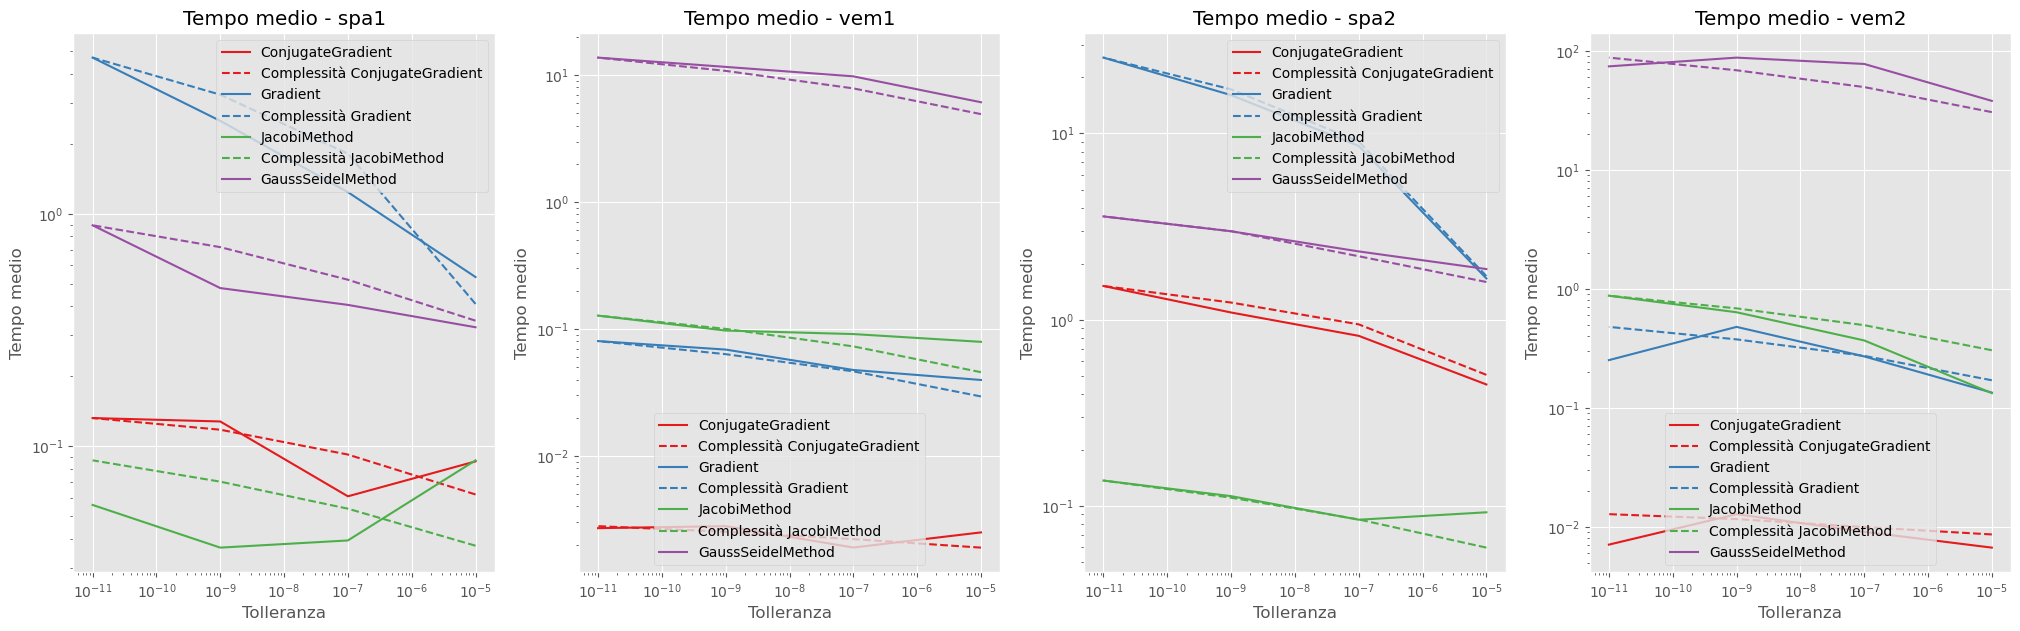

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=len(matrici), figsize=(25, 7))

# Itera attraverso ogni matrice
for idx, matrice in enumerate(matrici):
    # Filtra i dati per la matrice corrente
    df_matrice = df[df["matrice"] == matrice]
    df_matrice = df_matrice.sort_values(by="tolleranza")

    for col, metodo in enumerate(df_matrice["metodo"].unique()):
        df_metodo = df_matrice[df_matrice["metodo"] == metodo]
        df_metodo = df_metodo.sort_values(by=["tolleranza"], axis=0, ascending=False)
        sns.lineplot(
            ax=axes[idx],
            data=df_metodo,
            x="tolleranza",
            y="times",
            label=metodo,
            color=colors[col],
        )
        # axes[idx].fill_between(
        #     df_metodo["tolleranza"],
        #     df_metodo["times"] - df_metodo["std_time"],
        #     df_metodo["times"] + df_metodo["std_time"],
        #     alpha=0.3,
        #     color=colors[col],
        # )
        # axes[idx].errorbar(
        #     df_metodo["tolleranza"],
        #     df_metodo["times"],
        #     yerr=df_metodo["std_time"],
        #     fmt="o",
        #     color=colors[col],
        # )
        theoretical = theoretical_complexity(
                metodo, matrix_sizes[matrice], df_metodo["iterations"]
            )
        theoretical = traslation_theoretical_compl(theoretical, df_metodo['times'])
        
        aggiungi_linea_complessita(
            ax=axes[idx],
            x=df_metodo["tolleranza"],
            y=theoretical,
            label=f"Complessità {metodo}",
            color=colors[col],
        )

    axes[idx].set_title(f"Tempo medio - {matrice}")
    axes[idx].set_xlabel("Tolleranza")
    axes[idx].set_ylabel("Tempo medio")
    axes[idx].set_yscale("log")
    axes[idx].set_xscale("log")

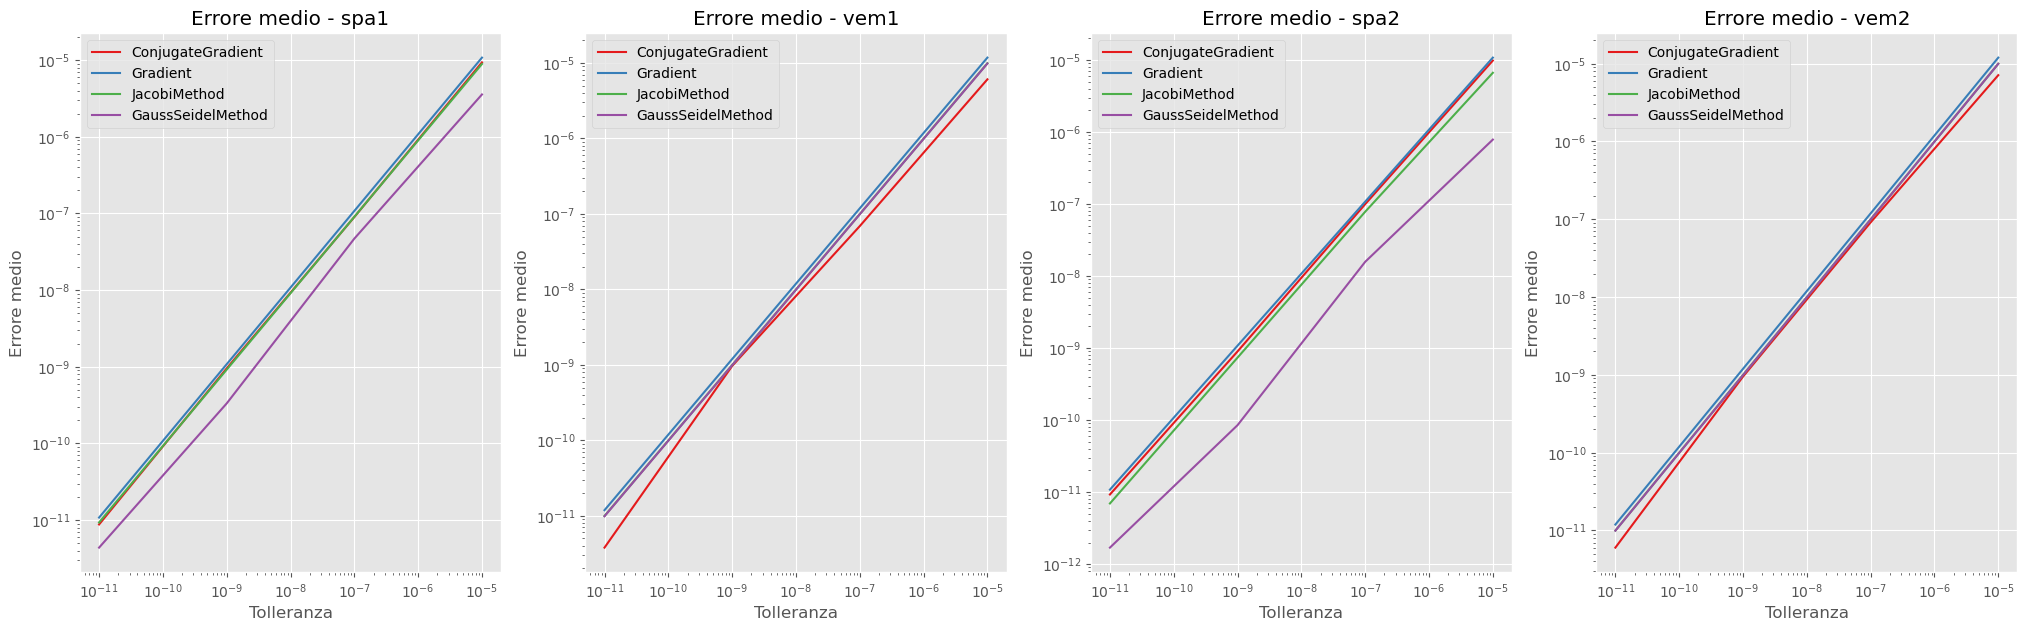

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=len(matrici), figsize=(25, 7))

# Itera attraverso ogni matrice
for idx, matrice in enumerate(matrici):
    # Filtra i dati per la matrice corrente
    df_matrice = df[df["matrice"] == matrice]
    df_matrice = df_matrice.sort_values(by="tolleranza")

    for col, metodo in enumerate(df_matrice["metodo"].unique()):
        df_metodo = df_matrice[df_matrice["metodo"] == metodo]
        df_metodo = df_metodo.sort_values(by=["tolleranza"], axis=0, ascending=False)
        sns.lineplot(
            ax=axes[idx],
            data=df_metodo,
            x="tolleranza",
            y="errors",
            label=metodo,
            color=colors[col],
        )

    axes[idx].set_title(f"Errore medio - {matrice}")
    axes[idx].set_xlabel("Tolleranza")
    axes[idx].set_ylabel("Errore medio")
    axes[idx].set_yscale("log")
    axes[idx].set_xscale("log")

In [18]:
df[df['iterations'] == df['iterations'].max()]

,matrice,tolleranza,metodo,std_memory,errors,iterations,std_time,std_errors,memory,times,std_iterations
9,spa1,1.000000e-11,Gradient,5.991822e-14,1.078838e-11,15264,0.194662,1.702978e-27,372.230128,4.6986,0.0
